![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import sqlite3
from pandasql import sqldf 
pysqldf = lambda q: sqldf(q, globals())

In [2]:
conn = sqlite3.Connection(r'C:\Users\Patrick Parkinson\Documents\Flatiron\Projects\Project 1\Working_Repository\Movie-Analysis\zippedData\SQL_data\im.db')

In [3]:
#Describe initial strategy...data overview, variable and dataset justification

q = """
SELECT *
FROM movie_basics
JOIN movie_ratings
  USING(movie_id)

"""

basic_rate_df = pd.read_sql(q, conn)
basic_rate_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [4]:
#highlight missing values...why we can do join first

basic_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [5]:
budget_gross_df = pd.read_csv(r'C:\Users\Patrick Parkinson\Documents\Flatiron\Projects\Project 1\Working_Repository\Movie-Analysis\zippedData\tn.movie_budgets.csv.gz')
budget_gross_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
#No missing values, lets join

budget_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
#Check what to join on....Primary title and original title only seem to differ when original title in different language

basic_rate_df[basic_rate_df.primary_title != basic_rate_df.original_title]


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
10,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120
12,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584
...,...,...,...,...,...,...,...,...
73804,tt9875852,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy",5.8,50
73824,tt9894394,Upin & Ipin: The Lone Gibbon Kris,Upin & Ipin: Keris Siamang Tunggal,2019,100.0,Animation,8.1,301
73829,tt9899840,Auntie Frog,Khaleh Ghurbagheh,2018,81.0,"Adventure,Comedy,Family",6.2,6
73830,tt9899850,The Agitation,Ashoftegi,2019,NaN,"Drama,Thriller",4.9,14


In [8]:
#go ahead and merge to see how much overlap

br_inc_merged = basic_rate_df.merge(budget_gross_df, how='inner', left_on='primary_title', right_on='movie')
print(len(br_inc_merged))
br_inc_merged.head()

2875


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"


In [9]:
#check if missing values

br_inc_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2875 non-null   object 
 1   primary_title      2875 non-null   object 
 2   original_title     2875 non-null   object 
 3   start_year         2875 non-null   int64  
 4   runtime_minutes    2757 non-null   float64
 5   genres             2867 non-null   object 
 6   averagerating      2875 non-null   float64
 7   numvotes           2875 non-null   int64  
 8   id                 2875 non-null   int64  
 9   release_date       2875 non-null   object 
 10  movie              2875 non-null   object 
 11  production_budget  2875 non-null   object 
 12  domestic_gross     2875 non-null   object 
 13  worldwide_gross    2875 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 336.9+ KB


In [10]:
#go ahead and drop missing

br_inc_merged.dropna(inplace=True)

In [11]:
br_inc_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2873
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2752 non-null   object 
 1   primary_title      2752 non-null   object 
 2   original_title     2752 non-null   object 
 3   start_year         2752 non-null   int64  
 4   runtime_minutes    2752 non-null   float64
 5   genres             2752 non-null   object 
 6   averagerating      2752 non-null   float64
 7   numvotes           2752 non-null   int64  
 8   id                 2752 non-null   int64  
 9   release_date       2752 non-null   object 
 10  movie              2752 non-null   object 
 11  production_budget  2752 non-null   object 
 12  domestic_gross     2752 non-null   object 
 13  worldwide_gross    2752 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 322.5+ KB


In [12]:
#make sure there's nothing we can do to help yield more data points

pd.set_option('display.max_rows', 10000)
basic_rate_pt = basic_rate_df['primary_title'].copy()

budget_gross_pt = budget_gross_df['movie'].copy()

pt_concat = pd.concat([basic_rate_pt, budget_gross_pt])
# print(len(pt_concat))

pt_concat.drop_duplicates(inplace=True)
# print(len(pt_concat))

pt_concat.sort_values(ascending=True, inplace=True)
# print(len(pt_concat))

print(pt_concat.iloc[10000: 20000])

1594                                           Bodhisattva
43551                                               Bodhon
57376                                               Bodied
25915                                               Bodies
69044                                       Bodies at Rest
53953                                           Bodkin Ras
61911                                                 Bodo
38546                                                Bodom
7135                                                  Body
13907                                        Body Complete
3640                                           Body Double
61950                                        Body Electric
53643                                            Body Farm
21290                               Body Fat Index of Love
24422                                            Body High
39719                                         Body Keepers
13369                                        Body Langua

To do: 
 - Maybe include more of the work you did on opening other datasets

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

Data Prep Plan:
 - Building ERD DataFrame (maybe some prelim analysis)
 - Evaluate DF - check against outside DF
 - Combine / Analyze / Visualize

Data Cleaning / Feature Engineering

In [13]:
#run once to remove $ signs and change dollar amounts to int
br_inc_merged['production_budget'] = br_inc_merged['production_budget'].str.replace(r'[^\w\s]+', '').astype('int64')
br_inc_merged['domestic_gross'] = br_inc_merged['domestic_gross'].str.replace(r'[^\w\s]+', '').astype('int64')
br_inc_merged['worldwide_gross'] = br_inc_merged['worldwide_gross'].str.replace(r'[^\w\s]+', '').astype('int64')



In [14]:
#assume that this is the actual income...budget is actually what was spent

br_inc_merged['domestic_income'] = br_inc_merged['domestic_gross'] - br_inc_merged['production_budget']
br_inc_merged['worldwide_income'] = br_inc_merged['worldwide_gross'] - br_inc_merged['production_budget']

br_inc_merged['worldwide_ROI'] = (br_inc_merged['worldwide_income'] / br_inc_merged['production_budget'])*100

In [15]:
br_inc_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2873
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2752 non-null   object 
 1   primary_title      2752 non-null   object 
 2   original_title     2752 non-null   object 
 3   start_year         2752 non-null   int64  
 4   runtime_minutes    2752 non-null   float64
 5   genres             2752 non-null   object 
 6   averagerating      2752 non-null   float64
 7   numvotes           2752 non-null   int64  
 8   id                 2752 non-null   int64  
 9   release_date       2752 non-null   object 
 10  movie              2752 non-null   object 
 11  production_budget  2752 non-null   int64  
 12  domestic_gross     2752 non-null   int64  
 13  worldwide_gross    2752 non-null   int64  
 14  domestic_income    2752 non-null   int64  
 15  worldwide_income   2752 non-null   int64  
 16  worldwide_ROI      2752 

In [16]:
genre_df = br_inc_merged.copy()

In [17]:
genre_df['genres'] = genre_df['genres'].str.split(',')

In [18]:
genre_df = genre_df.explode('genres')
genre_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_income,worldwide_income,worldwide_ROI
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,Action,1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294,-99.836209
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,Animation,1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294,-99.836209
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,Comedy,1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294,-99.836209
2,tt3844362,The Overnight,The Overnight,2015,79.0,Comedy,6.1,14828,21,"Jun 19, 2015",The Overnight,200000,1109808,1165996,909808,965996,482.998000
2,tt3844362,The Overnight,The Overnight,2015,79.0,Mystery,6.1,14828,21,"Jun 19, 2015",The Overnight,200000,1109808,1165996,909808,965996,482.998000


In [19]:
#TESTS 



(0.0, 200.0)

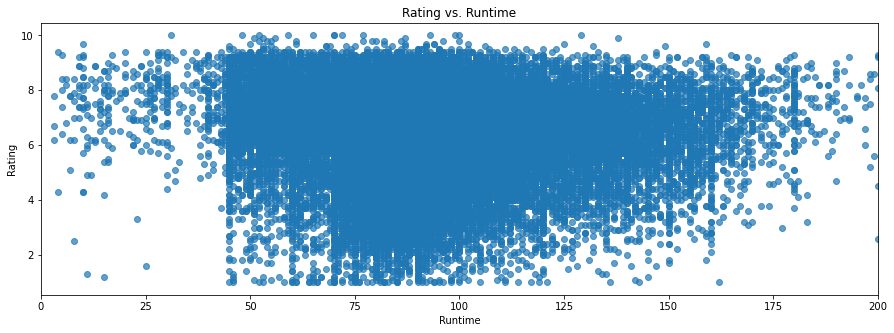

In [20]:
#Rating vs Runtime: Full Dataset

#Finding: Certain runtimes not included in budget analysis

fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(basic_rate_df['runtime_minutes'], basic_rate_df['averagerating'], alpha = .7)
ax.set_title('Rating vs. Runtime')
ax.set_xlabel('Runtime')
ax.set_ylabel('Rating')

plt.xlim(0, 200)

Questions to explore
- do longer movies cost more? Larger budgets? Maybe there is a sweet spot for where to generate best income

## Analysis
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

EDA

There a way I can get all this describe data to show up in a single table????

In [21]:
br_inc_merged['averagerating'].describe()

count    2752.000000
mean        6.243132
std         1.168073
min         1.600000
25%         5.600000
50%         6.400000
75%         7.100000
max         9.200000
Name: averagerating, dtype: float64

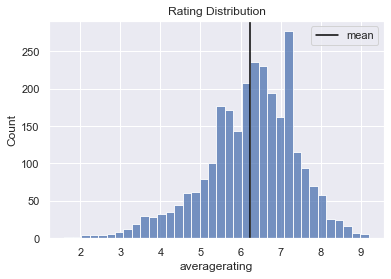

In [22]:
sns.set_theme(style='darkgrid')

g = sns.histplot(data=br_inc_merged['averagerating'])
g.set(title='Rating Distribution')
# g.axvline(x=br_inc_merged['averagerating'].mean(), color='black', label=str(np.mean(br_inc_merged['averagerating'])))
g.axvline(x=br_inc_merged['averagerating'].mean(), color='black', label='mean')
g.legend(loc='upper right')

In [23]:
br_inc_merged['production_budget'].describe()

count    2.752000e+03
mean     3.473329e+07
std      4.822579e+07
min      1.400000e+03
25%      5.000000e+06
50%      1.785000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [24]:
br_inc_merged['production_budget'].median()

17850000.0

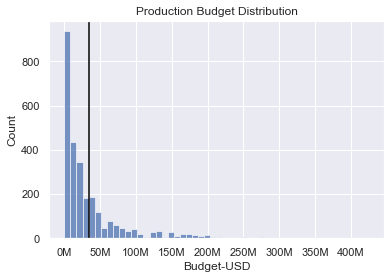

In [25]:

g = sns.histplot(data=br_inc_merged['production_budget'], bins=50)
g.set(title='Production Budget Distribution', xlabel='Budget-USD');

g.set_xticks(range(0, 450000000, 50000000))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
g.axvline(x=br_inc_merged['production_budget'].mean(), color='black')

C:\Users\Patrick Parkinson\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


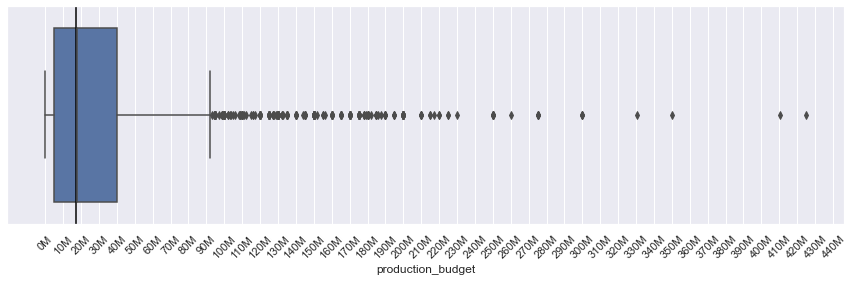

In [26]:
ax, fig = plt.subplots(figsize=(15,4))
g = sns.boxplot(br_inc_merged['production_budget']);
g.set_xticks(range(0, 450000000, 10000000))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000];
g.set_xticklabels(xlabels, rotation=45);

g.axvline(x=17000000.0, color='black')

C:\Users\Patrick Parkinson\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


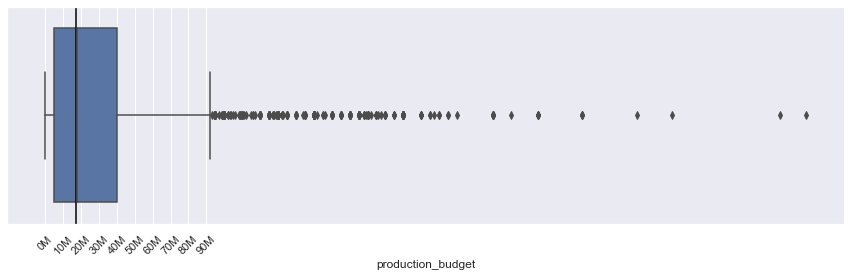

In [27]:
ax, fig = plt.subplots(figsize=(15,4))
g = sns.boxplot(br_inc_merged['production_budget']);
g.set_xticks(range(0, 100000000, 10000000))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000];
g.set_xticklabels(xlabels, rotation=45);

g.axvline(x=17000000.0, color='black')


In [28]:
br_inc_merged['worldwide_income'].describe()

count    2.752000e+03
mean     6.965094e+07
std      1.682778e+08
min     -2.002376e+08
25%     -2.300000e+06
50%      9.873828e+06
75%      6.612770e+07
max      2.351345e+09
Name: worldwide_income, dtype: float64

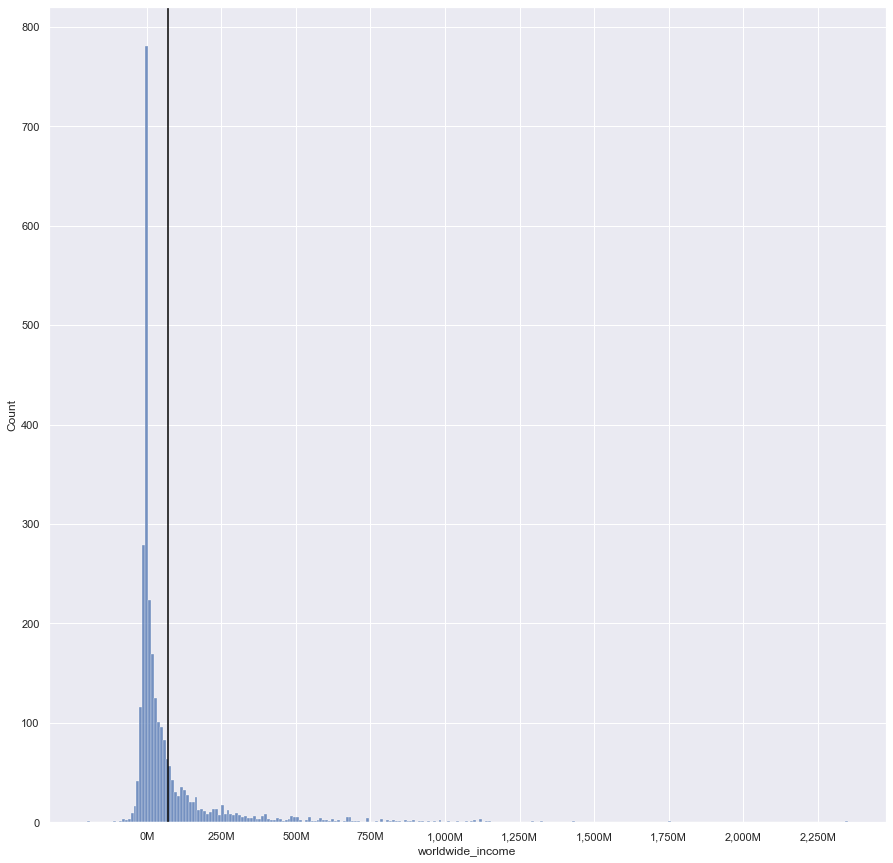

In [29]:
#show one zoomed out, one zoomed in 


fig,ax = plt.subplots(figsize=(15,15))
g = sns.histplot(ax=ax, data=br_inc_merged['worldwide_income'])

g.set_xticks(range(0, 2500000000, 250000000))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)

g.axvline(x=br_inc_merged['worldwide_income'].mean(), color='black')


C:\Users\Patrick Parkinson\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


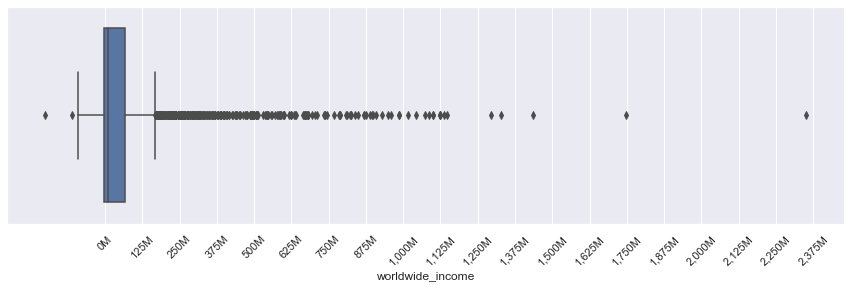

In [30]:
ax, fig = plt.subplots(figsize=(15,4))
g = sns.boxplot(br_inc_merged['worldwide_income']);
g.set_xticks(range(0, 2500000000, 125000000))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000];
g.set_xticklabels(xlabels, rotation=45);




In [31]:
br_inc_merged['runtime_minutes'].describe()

count    2752.000000
mean      102.972020
std        20.786121
min         3.000000
25%        90.000000
50%       101.000000
75%       113.250000
max       280.000000
Name: runtime_minutes, dtype: float64

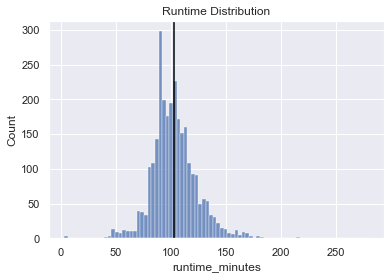

In [32]:
g=sns.histplot(data=br_inc_merged['runtime_minutes'])
g.set(title='Runtime Distribution')
g.axvline(x=br_inc_merged['runtime_minutes'].mean(), color='black')

C:\Users\Patrick Parkinson\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


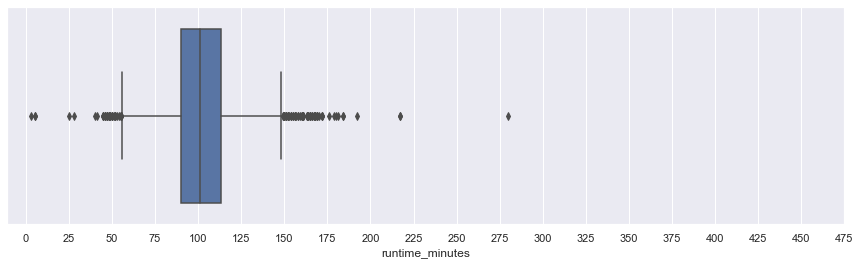

In [33]:
ax, fig = plt.subplots(figsize=(15,4))
g = sns.boxplot(br_inc_merged['runtime_minutes']);
g.set_xticks(range(0, 500, 25));
# xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000];
# g.set_xticklabels(rotation=45);

# plt.xlim(0,50)

In [34]:
br_inc_merged['worldwide_ROI'].describe()

count     2752.000000
mean       305.019968
std       1493.227031
min       -100.000000
25%        -69.063376
50%         58.644429
75%        258.142857
max      41556.474000
Name: worldwide_ROI, dtype: float64

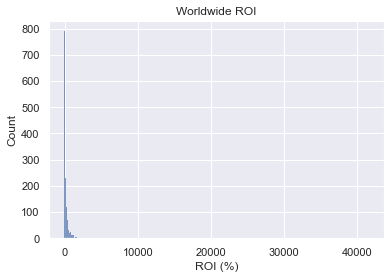

In [35]:
g = sns.histplot(data=br_inc_merged['worldwide_ROI'])
g.set(title='Worldwide ROI', xlabel='ROI (%)');

# g.set_xticks(range(0, 450000000, 50000000))
# xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
# g.set_xticklabels(xlabels)
# g.axvline(x=br_inc_merged['production_budget'].mean(), color='black')

In [36]:
#ROI outlier analysis...ABOVE 1000 is ~top 5%
print(len(br_inc_merged[br_inc_merged['worldwide_ROI']>1000]) / len(br_inc_merged))
print(len(br_inc_merged[br_inc_merged['worldwide_ROI']>750]) / len(br_inc_merged))

0.05886627906976744
0.08357558139534883


C:\Users\Patrick Parkinson\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-250.0, 2000.0)

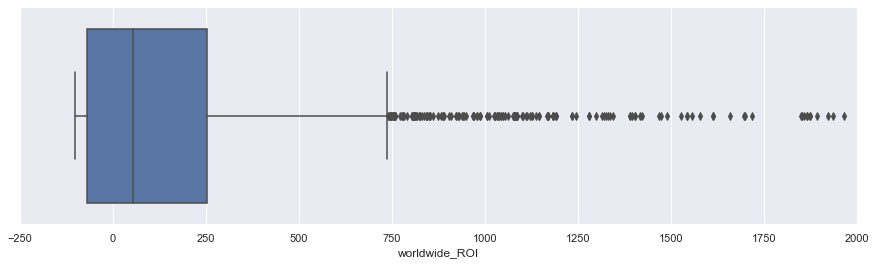

In [71]:
ax, fig = plt.subplots(figsize=(15,4))
g = sns.boxplot(br_inc_merged['worldwide_ROI']);
# g.set_xticks(range(0, 50000, 500));
# xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000];
# g.set_xticklabels(xlabels, rotation=45);

plt.xlim([-250, 2000])

In [38]:
br_inc_merged[br_inc_merged['worldwide_ROI']>4000].sort_values('worldwide_ROI',ascending=False)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_income,worldwide_income,worldwide_ROI
1911,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",4.2,17763,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,22664410,41556474,41556.474000
2134,tt2668120,Bambi,Bambi,2013,58.0,"Biography,Documentary",7.0,101,47,"Aug 13, 1942",Bambi,858000,102797000,268000000,101939000,267142000,31135.431235
2350,tt3393372,Night of the Living Dead,Night of the Living Dead,2014,79.0,Horror,5.3,277,77,"Oct 1, 1968",Night of the Living Dead,114000,12087064,30087064,11973064,29973064,26292.161404
2262,tt3080284,Rocky,Rocky,2013,136.0,"Action,Comedy,Drama",6.1,46,11,"Nov 21, 1976",Rocky,1000000,117235147,225000000,116235147,224000000,22400.000000
762,tt1502407,Halloween,Halloween,2018,106.0,"Horror,Thriller",6.6,88395,37,"Oct 17, 1978",Halloween,325000,47000000,70000000,46675000,69675000,21438.461538
847,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,Horror,4.2,33522,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,52262945,100759490,10075.949000
2551,tt4196450,The Birth of a Nation,The Birth of a Nation,2016,120.0,"Biography,Drama,History",6.4,18442,78,"Feb 8, 1915",The Birth of a Nation,110000,10000000,11000000,9890000,10890000,9900.000000
2108,tt2616818,Graduation Day,Graduation Day,2015,75.0,Thriller,5.0,52,69,"May 1, 1981",Graduation Day,250000,23894000,23894000,23644000,23644000,9457.600000
1047,tt1661199,Cinderella,Cinderella,2015,105.0,"Drama,Family,Fantasy",6.9,142792,76,"Feb 15, 1950",Cinderella,2900000,85000000,263591415,82100000,260691415,8989.359138
1676,tt2393825,Home,Home,2013,112.0,Drama,7.0,140,60,"Apr 23, 2009",Home,500000,15433,44793168,-484567,44293168,8858.633600


In [39]:
#INSERT EDA ON GENRES???

Drop budgets greater than 240M, incomes greater than 1,250M, and runtime minutes greater than 200 in both DF's

REVISIT WHETHER EVERYTHING SHOULD BE DONE IN SAME DB

SHOULD WE RECALCULATE EDA AFTER DROPPING THESE VALUES?

UPDATE AND REMOVE LOW RUNTIMES

In [40]:
# print(len(br_inc_merged))

index_drop = br_inc_merged[(br_inc_merged['production_budget'] > 240000000) | 
                              (br_inc_merged['worldwide_income'] > 1250000000) |
                              (br_inc_merged['worldwide_ROI'] > 15000)].index
index_drop_genre = genre_df[(genre_df['production_budget'] > 240000000) | 
                              (genre_df['worldwide_income'] > 1250000000) |
                              (genre_df['worldwide_ROI'] > 15000)].index

br_inc_merged.drop(index_drop, inplace=True)
genre_df.drop(index_drop_genre, inplace=True)

# print(len(br_inc_merged))

C:\Users\Patrick Parkinson\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


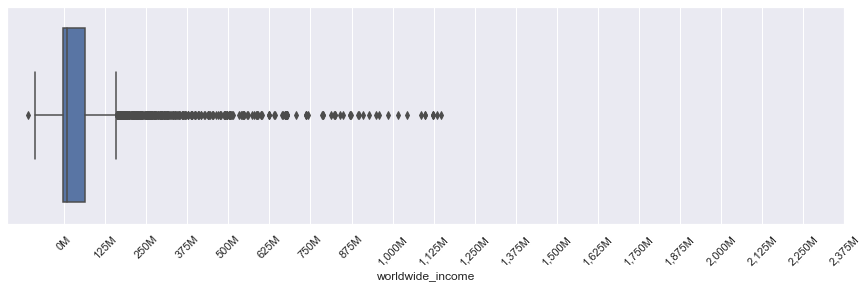

In [41]:
ax, fig = plt.subplots(figsize=(15,4))
g = sns.boxplot(br_inc_merged['worldwide_income']);
g.set_xticks(range(0, 2500000000, 125000000))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000];
g.set_xticklabels(xlabels, rotation=45);

C:\Users\Patrick Parkinson\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


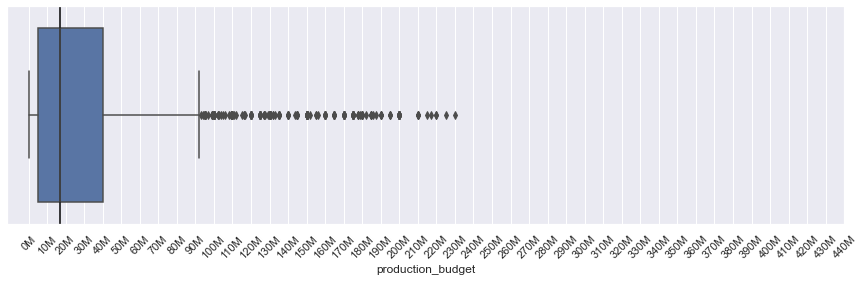

In [42]:
ax, fig = plt.subplots(figsize=(15,4))
g = sns.boxplot(br_inc_merged['production_budget']);
g.set_xticks(range(0, 450000000, 10000000))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000];
g.set_xticklabels(xlabels, rotation=45);

g.axvline(x=17000000.0, color='black')

In [43]:
br_inc_merged['worldwide_ROI'].describe()

count     2726.000000
mean       253.285213
std        826.918902
min       -100.000000
25%        -69.703227
50%         55.584584
75%        253.283530
max      10075.949000
Name: worldwide_ROI, dtype: float64

Analysis

Worldwide income vs. rating
5 - 9 rating range most income...potential highlight on 5 - 9, above black line. Note there movies across the 
full range of ratings without high income 

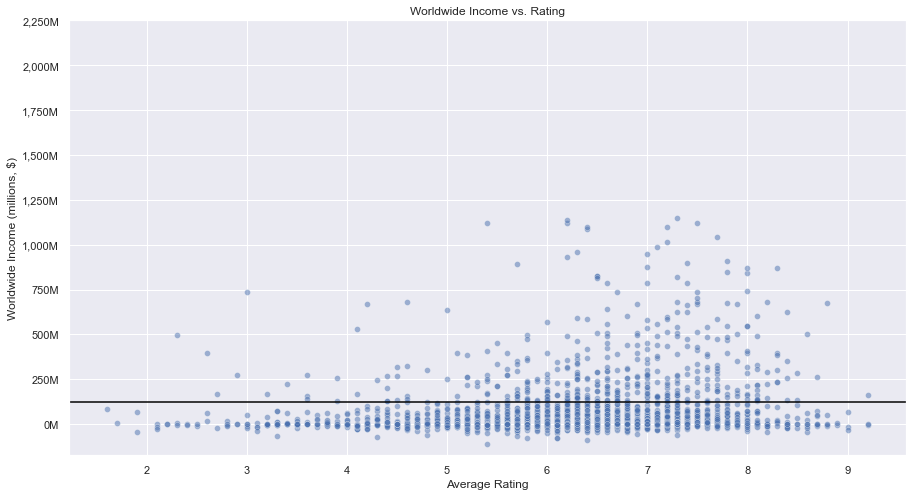

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
g = sns.scatterplot(ax=ax, x=br_inc_merged['averagerating'], y=br_inc_merged['worldwide_income'], alpha=.5);
g.set(title='Worldwide Income vs. Rating', xlabel='Average Rating', ylabel='Worldwide Income (millions, $)')
g.set_yticks(range(0, 2500000000, 250000000))

ylabels = ['{:,.0f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)
g.axhline(y=(1/2)*250000000, color='black')

In [45]:
np.corrcoef(br_inc_merged['averagerating'], br_inc_merged['worldwide_income'])

array([[1.        , 0.16860812],
       [0.16860812, 1.        ]])

In [46]:
np.corrcoef(br_inc_merged['averagerating'], br_inc_merged['production_budget'])

array([[1.        , 0.12387821],
       [0.12387821, 1.        ]])

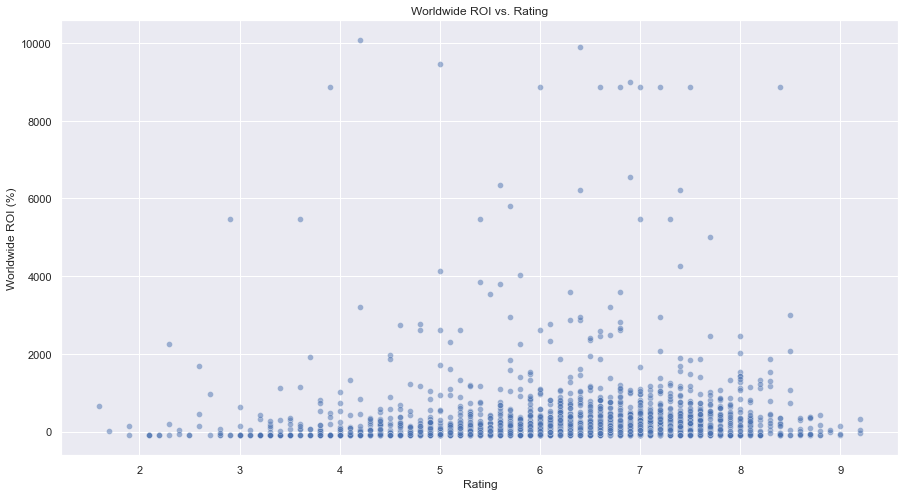

In [85]:
#ROI vs. rating...do this analysis first
fig, ax = plt.subplots(figsize=(15,8))
g = sns.scatterplot(ax=ax, x=br_inc_merged['averagerating'], y=br_inc_merged['worldwide_ROI'], alpha=.5);
g.set(title='Worldwide ROI vs. Rating', xlabel='Rating', ylabel='Worldwide ROI (%)');

In [86]:
bins_rating = [0, 2, 4, 6, 8, 10]
labels_rating = ['0-2','2-4','4-6','6-8','8-10']
br_inc_merged['rating_bins'] = pd.cut(br_inc_merged['averagerating'], bins_rating, labels=labels_rating)

In [93]:
####################perhaps group these into a single area after examination of scatter plots##########################3333

rating_means_df = br_inc_merged.groupby('rating_bins', as_index=False).mean()
rating_means_df_mask = br_inc_merged[br_inc_merged['worldwide_ROI']<1000].groupby('rating_bins', as_index=False).mean()

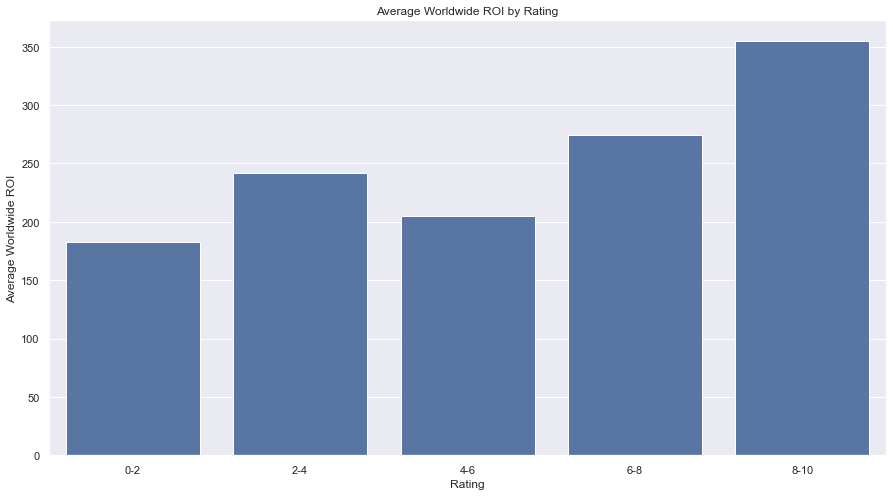

In [91]:
fig, ax = plt.subplots(figsize=(15,8))
# data_runtime_means = runtime_means_df.sort_values(by='', ascending=False);
g = sns.barplot(data=rating_means_df, x='rating_bins', y='worldwide_ROI', ax=ax, color='b')
g.set(title='Average Worldwide ROI by Rating', xlabel='Rating', ylabel='Average Worldwide ROI');
# g.set_xticks(range(0, 1500, 100));

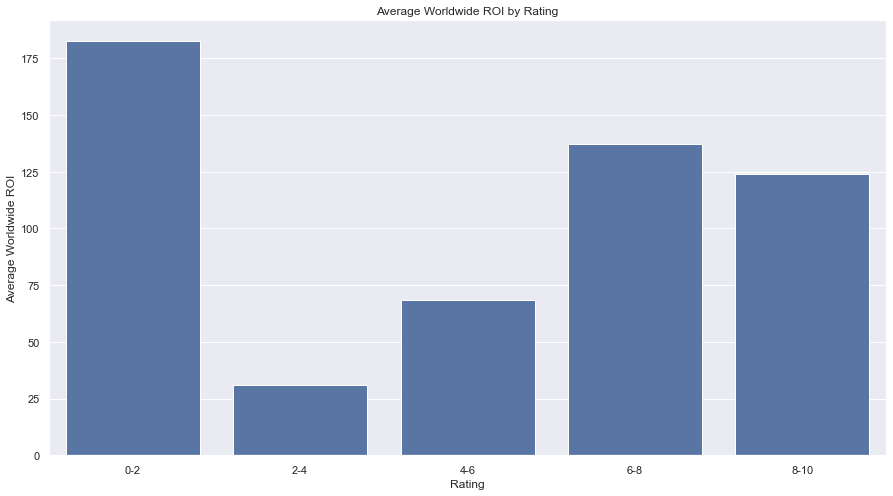

In [94]:
fig, ax = plt.subplots(figsize=(15,8))
# data_runtime_means = runtime_means_df.sort_values(by='', ascending=False);
g = sns.barplot(data=rating_means_df_mask, x='rating_bins', y='worldwide_ROI', ax=ax, color='b')
g.set(title='Average Worldwide ROI by Rating', xlabel='Rating', ylabel='Average Worldwide ROI');
# g.set_xticks(range(0, 1500, 100));

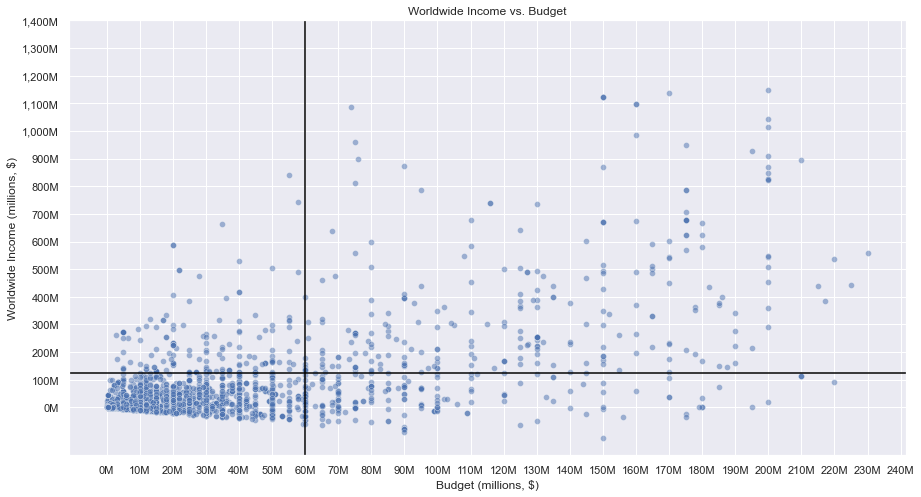

In [48]:
fig, ax = plt.subplots(figsize=(15,8))
g = sns.scatterplot(ax=ax, x=br_inc_merged['production_budget'], y=br_inc_merged['worldwide_income'], alpha=.5);
g.set(title='Worldwide Income vs. Budget', xlabel='Budget (millions, $)', ylabel='Worldwide Income (millions, $)')

g.set_xticks(range(0, 250000000, 10000000))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)

g.set_yticks(range(0, 1500000000, 100000000))
ylabels = ['{:,.0f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)


g.axhline(y=(1/2)*250000000, color='black')
g.axvline(x=60000000, color='black')

# plt.xlim([0, 60000000])

Calculating covariance, Do ROI instead

Worldwide income vs budget
- both high and low incomes across the range of budgets
- most of movies in 0 to 60M budget make <=125M (covers more than 75%-actually 100% w/o outliers of movies per EDA)
--->doesn't seem to be big range in difference in income based in range from 0 to 60M... ANALYZE THIS
- less movies above 60M but once you get to this point there are more > 125M (90M is considered outlier)

Additional work
- group into low (<30), medium (30 to 60), and high budget (60 - 200M...cut out outliers)....take averages...especially in low and medium groups
--->when taking averages remove outliers above 1,500M
- maybe graph zoomed in versions?
- filter incomes out above 125 and then take average


In [49]:
np.corrcoef(br_inc_merged['production_budget'], br_inc_merged['worldwide_income'])

array([[1.        , 0.63529344],
       [0.63529344, 1.        ]])

In [50]:
br_inc_merged['budget_level'] = br_inc_merged['production_budget'].map(
     lambda x: 'Low' if x < 30000000 else ('Medium' if x < 60000000 else 'High'))

In [51]:
br_inc_merged.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_income,worldwide_income,worldwide_ROI,budget_level
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294,-99.836209,Medium
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",The Overnight,200000,1109808,1165996,909808,965996,482.998000,Low
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698,-62.746792,Low
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698,-62.746792,Low
5,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698,-62.746792,Low


In [52]:
low_budget_inc = br_inc_merged[br_inc_merged['budget_level']=='Low']['worldwide_income'].mean()
print('Low budget worldwide income = ', low_budget_inc)
medium_budget_inc = br_inc_merged[br_inc_merged['budget_level']=='Medium']['worldwide_income'].mean()
print('Medium budget worldwide income = ', medium_budget_inc)
high_budget_inc = br_inc_merged[br_inc_merged['budget_level']=='High']['worldwide_income'].mean()
print('High budget worldwide income = ', high_budget_inc)

Low budget worldwide income =  20904739.403262094
Medium budget worldwide income =  58894970.28752643
High budget worldwide income =  230549655.91578948


(-150.0, 2000.0)

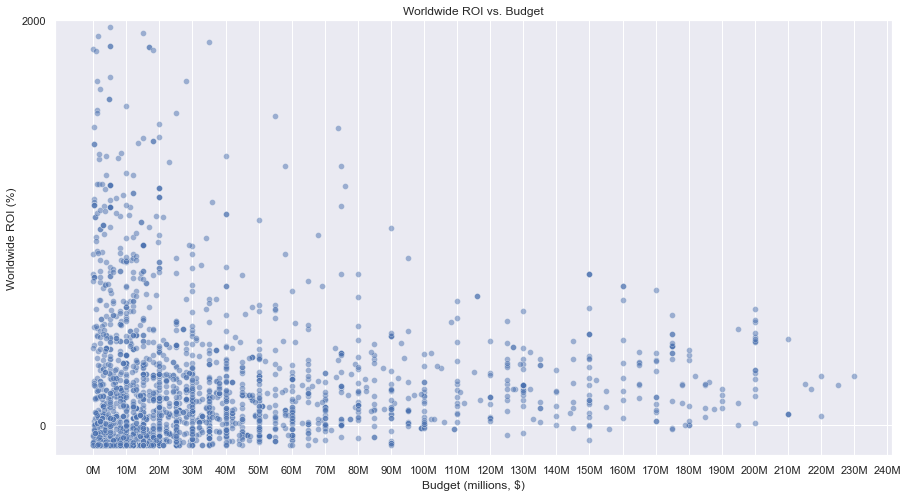

In [79]:
fig, ax = plt.subplots(figsize=(15,8))
g = sns.scatterplot(ax=ax, x=br_inc_merged['production_budget'], y=br_inc_merged['worldwide_ROI'], alpha=.5);
g.set(title='Worldwide ROI vs. Budget', xlabel='Budget (millions, $)', ylabel='Worldwide ROI (%)')

g.set_xticks(range(0, 250000000, 10000000))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels);

g.set_yticks(range(0, 40000, 2000));
# ylabels = ['{:,.0f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
# g.set_yticklabels(ylabels)


# g.axhline(y=(1/2)*250000000, color='black')
# g.axvline(x=60000000, color='black')

# plt.xlim([0, 10000000])
plt.ylim([-150, 2000])

In [54]:
np.corrcoef(br_inc_merged['production_budget'], br_inc_merged['worldwide_ROI'])

array([[ 1.        , -0.05428665],
       [-0.05428665,  1.        ]])

Runtime Analysis

(0.0, 125000000.0)

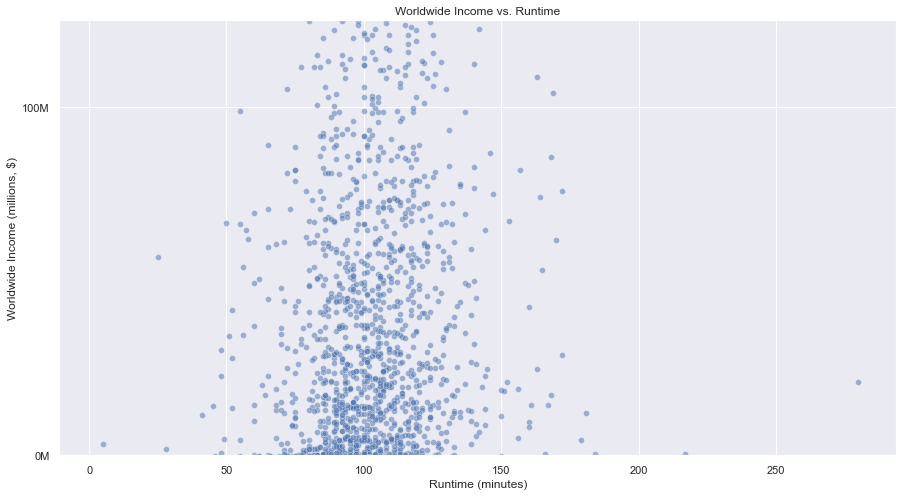

In [55]:
fig, ax = plt.subplots(figsize=(15,8))
g = sns.scatterplot(ax=ax, x=br_inc_merged['runtime_minutes'], y=br_inc_merged['worldwide_income'], alpha=.5);
g.set(title='Worldwide Income vs. Runtime', xlabel='Runtime (minutes)', ylabel='Worldwide Income (millions, $)');

# g.set_xticks(range(0, 250000000, 10000000))
# xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
# g.set_xticklabels(xlabels)

g.set_yticks(range(0, 1500000000, 100000000))
ylabels = ['{:,.0f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels);


# g.axhline(y=(1/2)*250000000, color='black')
# g.axvline(x=60000000, color='black')

plt.ylim([0, 125000000])

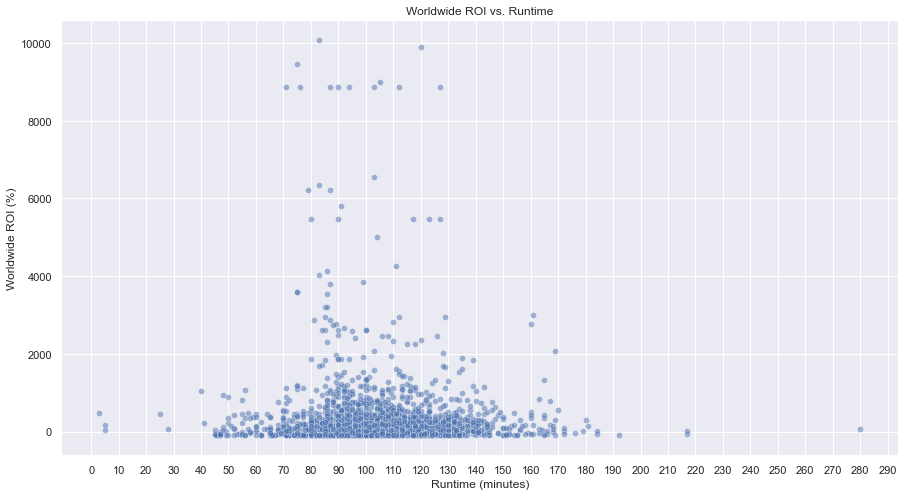

In [56]:
fig, ax = plt.subplots(figsize=(15,8))
g = sns.scatterplot(ax=ax, x=br_inc_merged['runtime_minutes'], y=br_inc_merged['worldwide_ROI'], alpha=.5);
g.set(title='Worldwide ROI vs. Runtime', xlabel='Runtime (minutes)', ylabel='Worldwide ROI (%)');

g.set_xticks(range(0, 300, 10));
# xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
# g.set_xticklabels(xlabels)

# g.set_yticks(range(0, 1500000000, 100000000))
# ylabels = ['{:,.0f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
# g.set_yticklabels(ylabels);


# g.axhline(y=(1/2)*250000000, color='black')
# g.axvline(x=60000000, color='black')

# plt.ylim([0, 1000])

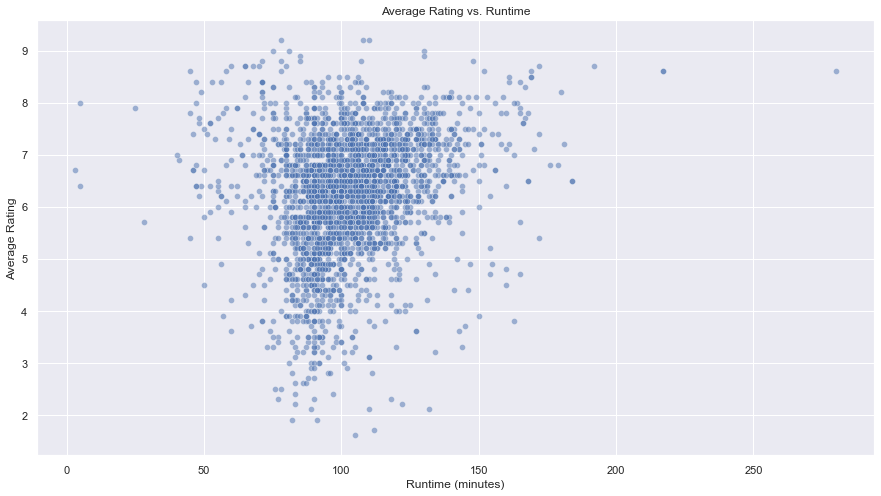

In [57]:
fig, ax = plt.subplots(figsize=(15,8))
g = sns.scatterplot(ax=ax, x=br_inc_merged['runtime_minutes'], y=br_inc_merged['averagerating'], alpha=.5);
g.set(title='Average Rating vs. Runtime', xlabel='Runtime (minutes)', ylabel='Average Rating');

# g.set_xticks(range(0, 250000000, 10000000))
# xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
# g.set_xticklabels(xlabels)

# g.set_yticks(range(0, 1500000000, 100000000))
# ylabels = ['{:,.0f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
# g.set_yticklabels(ylabels);


# g.axhline(y=(1/2)*250000000, color='black')
# g.axvline(x=60000000, color='black')

In [58]:
np.corrcoef(br_inc_merged['averagerating'], br_inc_merged['runtime_minutes'])

array([[1.        , 0.20383964],
       [0.20383964, 1.        ]])

In [59]:
bins_runtime = [0, 50, 70, 90, 110, 130, 150, 170, 290]
labels_runtime = ['0-50','50-70','70-90','90-110','110-130','130-150','150-170','170-290']
br_inc_merged['runtime_bins'] = pd.cut(br_inc_merged['runtime_minutes'], bins_runtime, labels=labels_runtime)

CREATE MASK SO WE CAN VIEW WITH AND WITHOUT OUTLIERS

In [76]:
#Aggregate DFs for runtime analysis
# runtime_means_df = br_inc_merged[br_inc_merged['worldwide_ROI']<2000].groupby('runtime_bins', as_index=False).mean()

runtime_means_df = br_inc_merged.groupby('runtime_bins', as_index=False).mean()

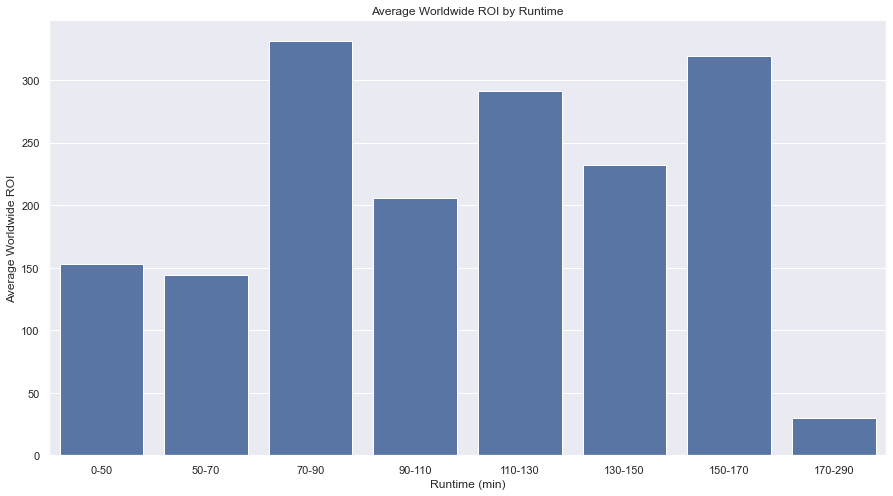

In [77]:
fig, ax = plt.subplots(figsize=(15,8))
# data_runtime_means = runtime_means_df.sort_values(by='', ascending=False);
g = sns.barplot(data=runtime_means_df, x='runtime_bins', y='worldwide_ROI', ax=ax, color='b')
g.set(title='Average Worldwide ROI by Runtime', xlabel='Runtime (min)', ylabel='Average Worldwide ROI');
# g.set_xticks(range(0, 1500, 100));

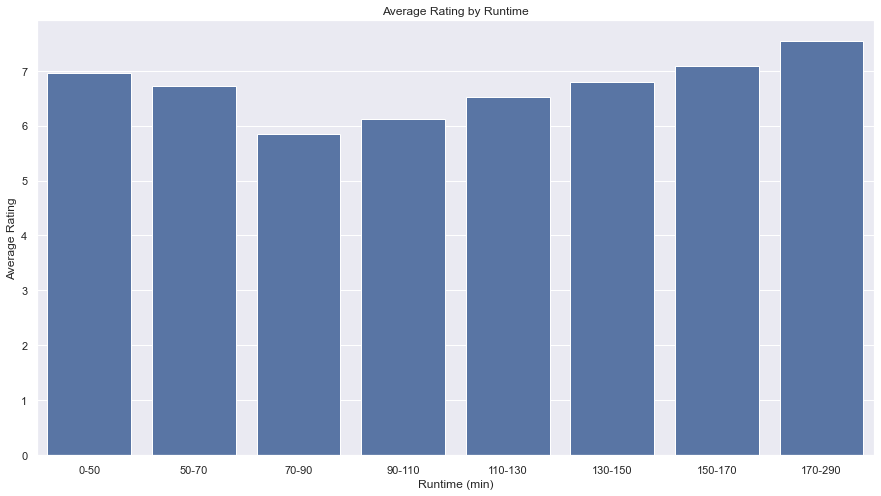

In [78]:
fig, ax = plt.subplots(figsize=(15,8))
# data_runtime_means = runtime_means_df.sort_values(by='', ascending=False);
g = sns.barplot(data=runtime_means_df, x='runtime_bins', y='averagerating', ax=ax, color='b')
g.set(title='Average Rating by Runtime', xlabel='Runtime (min)', ylabel='Average Rating');
# g.set_xticks(range(0, 1500, 100));

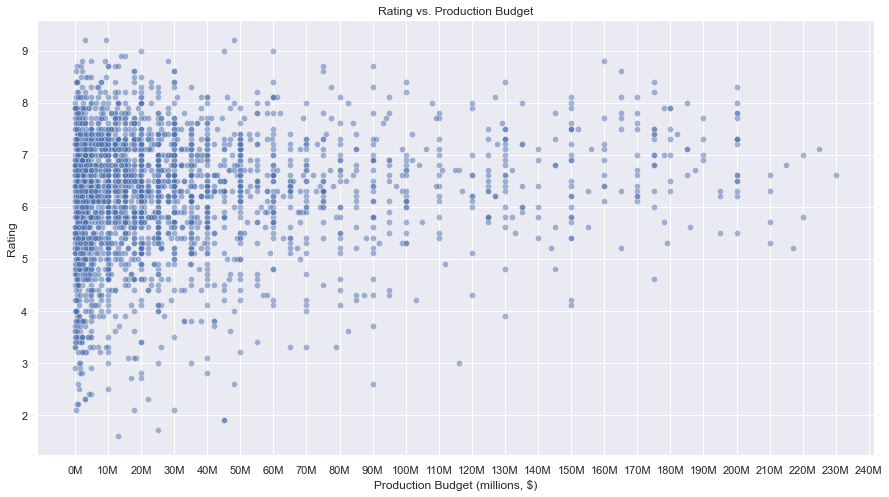

In [62]:
fig, ax = plt.subplots(figsize=(15,8))
g = sns.scatterplot(ax=ax, x=br_inc_merged['production_budget'], y=br_inc_merged['averagerating'], alpha=.5);
g.set(title='Rating vs. Production Budget', xlabel='Production Budget (millions, $)', ylabel='Rating')

g.set_xticks(range(0, 250000000, 10000000))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels);


# g.axhline(y=(1/2)*250000000, color='black')

In [63]:
budget_group = br_inc_merged.groupby('budget_level', as_index=False).mean().copy()
budget_group.head()



,budget_level,start_year,runtime_minutes,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,domestic_income,worldwide_income,worldwide_ROI
0,High,2014.018947,109.229474,6.462947,172441.284211,50.534737,1.121035e+08,1.258701e+08,3.426531e+08,1.376666e+07,2.305497e+08,192.074408
1,Low,2013.857705,100.173791,6.166929,33316.866704,50.966817,9.756057e+06,1.697785e+07,3.066080e+07,7.221795e+06,2.090474e+07,298.657377
2,Medium,2013.921776,105.778013,6.272304,82989.215645,52.613108,4.034249e+07,4.780672e+07,9.923747e+07,7.464220e+06,5.889497e+07,144.201542


<AxesSubplot:xlabel='budget_level', ylabel='averagerating'>

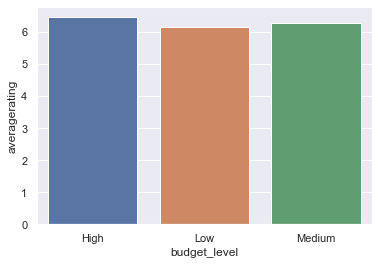

In [64]:
sns.barplot(data=budget_group, x='budget_level', y='averagerating')

In [65]:
br_inc_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2726 entries, 0 to 2873
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   movie_id           2726 non-null   object  
 1   primary_title      2726 non-null   object  
 2   original_title     2726 non-null   object  
 3   start_year         2726 non-null   int64   
 4   runtime_minutes    2726 non-null   float64 
 5   genres             2726 non-null   object  
 6   averagerating      2726 non-null   float64 
 7   numvotes           2726 non-null   int64   
 8   id                 2726 non-null   int64   
 9   release_date       2726 non-null   object  
 10  movie              2726 non-null   object  
 11  production_budget  2726 non-null   int64   
 12  domestic_gross     2726 non-null   int64   
 13  worldwide_gross    2726 non-null   int64   
 14  domestic_income    2726 non-null   int64   
 15  worldwide_income   2726 non-null   int64   
 16  worldw

In [66]:
genre_df_means = genre_df.groupby('genres', as_index=False).mean().copy()
genre_df_counts = genre_df.groupby('genres', as_index=False).count().copy()
genre_df_means['count'] = genre_df_counts['movie_id']

In [67]:
genre_df_means.head()

,genres,start_year,runtime_minutes,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,domestic_income,worldwide_income,worldwide_ROI,count
0,Action,2014.026846,109.590604,6.091275,129839.546980,50.956376,6.043252e+07,6.508207e+07,1.719132e+08,4.649555e+06,1.114806e+08,171.778047,596
1,Adventure,2014.229508,107.728337,6.360187,157258.133489,50.330211,8.406514e+07,9.832414e+07,2.724181e+08,1.425901e+07,1.883530e+08,212.759147,427
2,Animation,2014.166667,93.142857,6.488095,100186.444444,47.087302,8.541896e+07,1.166798e+08,3.194537e+08,3.126082e+07,2.340347e+08,331.687931,126
3,Biography,2014.500000,112.175258,6.971649,80926.484536,52.242268,2.558346e+07,3.434575e+07,7.130415e+07,8.762296e+06,4.572069e+07,232.178251,194
4,Comedy,2013.656757,101.474324,6.175270,67983.708108,51.054054,3.337477e+07,4.787237e+07,1.069871e+08,1.449760e+07,7.361235e+07,222.350690,740


DROP COUNTS LESS THAN 100

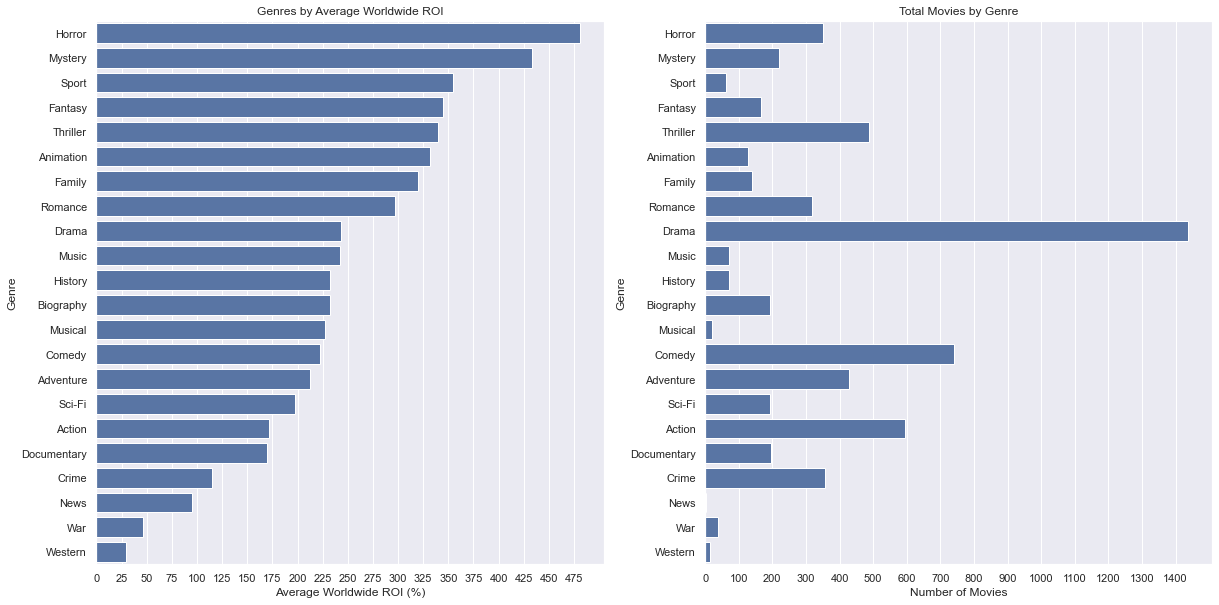

In [68]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
data_mean_ROI = genre_df_means.sort_values(by='worldwide_ROI', ascending=False)
g1 = sns.barplot(data=data_mean_ROI, x='worldwide_ROI', y='genres', ax=ax1, color='b')
g1.set(title='Genres by Average Worldwide ROI', xlabel='Average Worldwide ROI (%)', ylabel='Genre')
g1.set_xticks(range(0, 500, 25));

g = sns.barplot(data=data_mean_ROI, x='count', y='genres', ax=ax2, color='b')
g.set(title='Total Movies by Genre', xlabel='Number of Movies', ylabel='Genre');
g.set_xticks(range(0, 1500, 100));

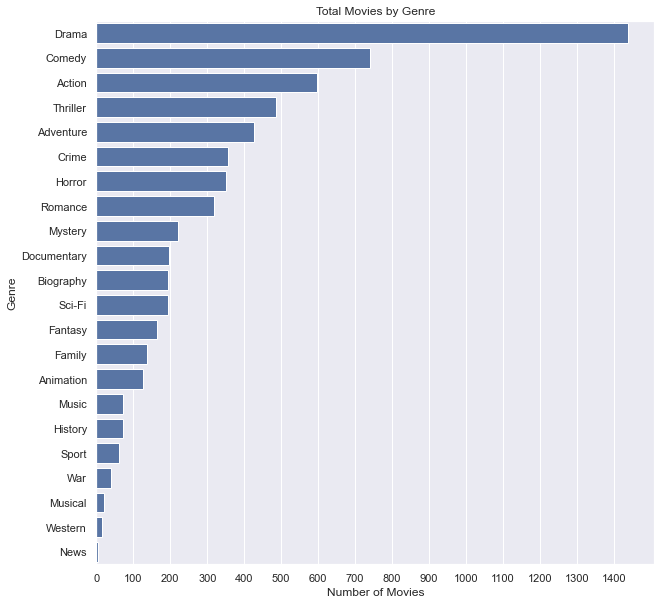

In [69]:
fig, ax = plt.subplots(figsize=(10,10))
data_genre_counts = genre_df_counts.sort_values(by='movie_id', ascending=False);
g = sns.barplot(data=data_genre_counts, x='movie_id', y='genres', ax=ax, color='b')
g.set(title='Total Movies by Genre', xlabel='Number of Movies', ylabel='Genre');
g.set_xticks(range(0, 1500, 100));

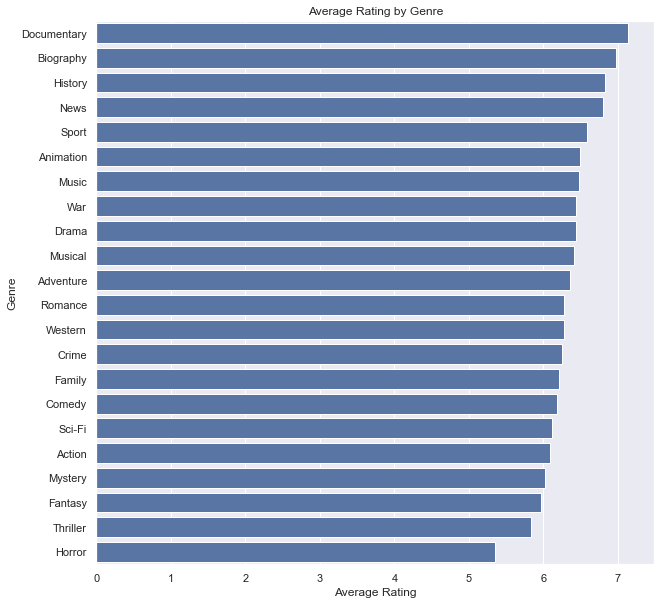

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
data_mean_reviews = genre_df_means.sort_values(by='averagerating', ascending=False);
g = sns.barplot(data=data_mean_reviews, x='averagerating', y='genres', ax=ax, color='b')
g.set(title='Average Rating by Genre', xlabel='Average Rating', ylabel='Genre');
# g.set_xticks(range(0, 1500, 100));

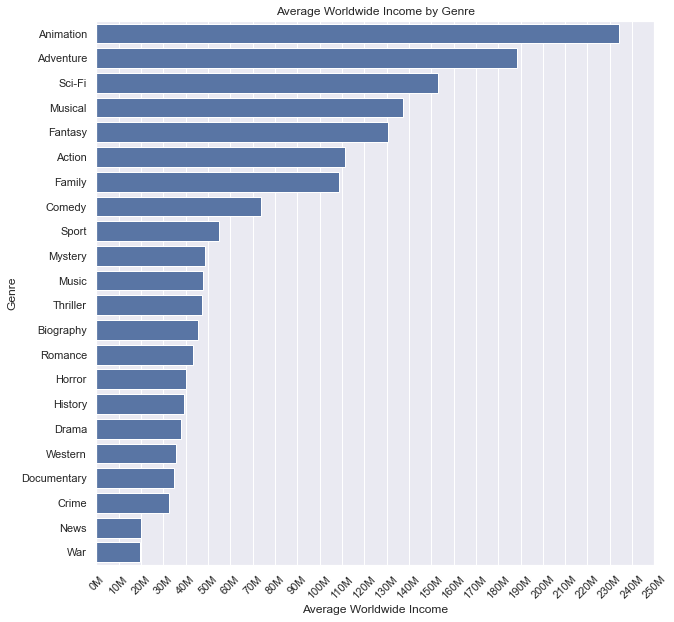

In [119]:
fig, ax = plt.subplots(figsize=(10,10))
data_mean_income = genre_df_means.sort_values(by='worldwide_income', ascending=False);
g = sns.barplot(data=data_mean_income, x='worldwide_income', y='genres', ax=ax, color='b')
g.set(title='Average Worldwide Income by Genre', xlabel='Average Worldwide Income', ylabel='Genre');

g.set_xticks(range(0, 260000000, 10000000))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels, rotation='45');

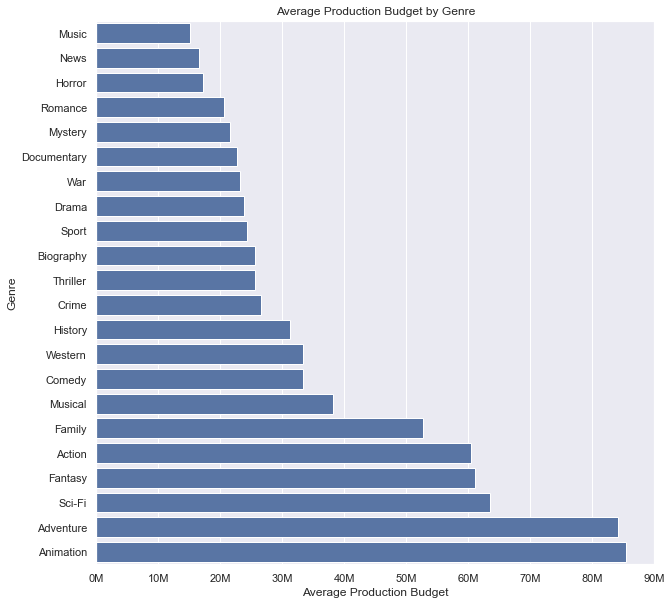

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
data_mean_income = genre_df_means.sort_values(by='production_budget', ascending=True);
g = sns.barplot(data=data_mean_income, x='production_budget', y='genres', ax=ax, color='b')
g.set(title='Average Production Budget by Genre', xlabel='Average Production Budget', ylabel='Genre');

g.set_xticks(range(0, 100000000, 10000000));
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels);

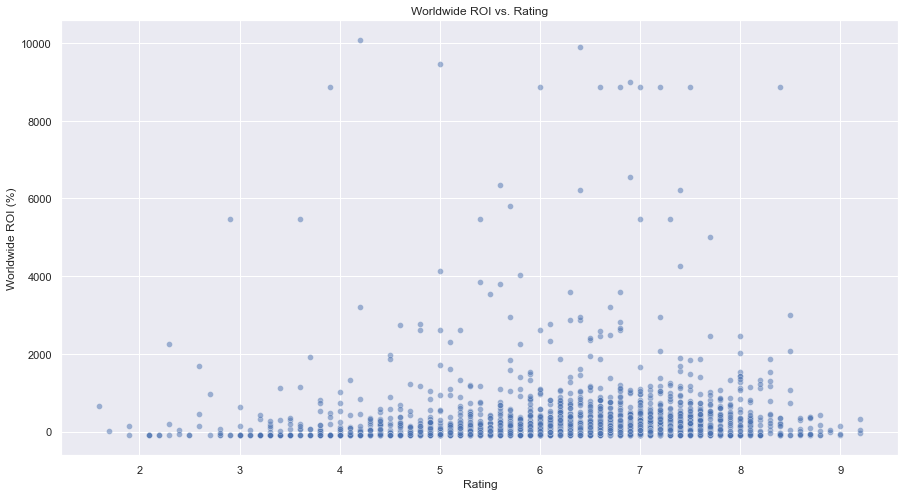

************************INITIAL EXPLORE***************************

In [ ]:
#Movie_basics + Movie_ratings

#Before combining w/people, likely need to fix missing values

q1 = """
SELECT *
FROM movie_basics
JOIN movie_ratings
  USING(movie_id)

"""

base_rate_df = pd.read_sql(q1, conn)
base_rate_df.head()




In [ ]:
base_rate_df.info()
#missing several runtime_minutes
#mising 4 genres

In [ ]:
#MOVIE_BASICS, MOVIE_RATINGS, PRINCIPALS

#Question: can I create a DF, modify it, and then join it w/SQL DF? -> yes, just make them both DF's and then combine

q2 = """
SELECT *
FROM movie_ratings
JOIN movie_basics
  USING(movie_id)
JOIN principals
  USING(movie_id)


"""

base_rate_prin_df = pd.read_sql(q2, conn)
base_rate_prin_df.head()




In [ ]:
base_rate_prin_df.groupby('primary_title').mean()

In [ ]:
base_rate_prin_df['category'].value_counts()

In [ ]:
#BOM MOVIE GROSS
movie_gross_df = pd.read_csv(r'C:\Users\Patrick Parkinson\Documents\Flatiron\Projects\Project 1\Working_Repository\Movie-Analysis\zippedData\bom.movie_gross.csv.gz')
movie_gross_df.head()

In [ ]:
movie_gross_df['title'].value_counts()

In [ ]:
movie_gross_df.info()

In [ ]:
#MOVIE BUDGETS

movie_budget_df = pd.read_csv(r'C:\Users\Patrick Parkinson\Documents\Flatiron\Projects\Project 1\Working_Repository\Movie-Analysis\zippedData\tn.movie_budgets.csv.gz')
movie_budget_df.head()

In [ ]:
movie_budget_df.info()

DATA PREP START

In [ ]:
q1 = """
SELECT *
FROM movie_basics
JOIN movie_ratings
  USING(movie_id)

"""

base_rate_df = pd.read_sql(q1, conn)
base_rate_df.head()

In [ ]:
base_rate_df.info()

In [ ]:
base_rate_df.isna().sum()

In [ ]:
base_rate_df[base_rate_df.genres.isna()]

In [ ]:
base_rate_df[base_rate_df.runtime_minutes.isna()]
#MAYBE ONLY TAKE OUT RUNTIME MINUTES WHEN YOU'RE ANALYZING THAT CATEGORY???

In [ ]:
base_rate_df.dropna(inplace = True)
base_rate_df.info()

In [ ]:
merged_budget = base_rate_df.merge(movie_budget_df, how='inner', left_on='primary_title', right_on='movie')
print(len(merged_budget))
merged_budget.head()

In [ ]:
merged_gross = base_rate_df.merge(movie_gross_df, how='inner', left_on='primary_title', right_on='title')
print(len(merged_gross))

TRY LEFT MERGE, JOINED SERIES...TEST IF TITLE MANIPULATION FEASIBLE

In [ ]:
merged_budget_o = base_rate_df.merge(movie_budget_df, how='outer', left_on='primary_title', right_on='movie')
print(len(merged_budget_o))



In [ ]:
merged_budget_o['test_col'] = False

In [ ]:
merged_budget_o.head()

for value in merged_budget_o['genres']:
    if value != merged_budget_o['test_col']:
        merged_budget_o['test_col'] = 1
    

In [ ]:
merged_budget_o[merged_budget_o.movie.notnull()]

In [ ]:
pd.set_option('display.max_rows', 10000)
base_rate_pt = base_rate_df['primary_title'].copy()

movie_budget_pt = movie_budget_df['movie'].copy()

# print(base_rate_pt)

# print(len(base_rate_pt))
# print(len(movie_budget_pt))

# result = pd.concat([base_rate_pt, movie_budget_pt])
# print(len(result))

result.sort_values(ascending=True, inplace=True)

# result

print(result.iloc[10000: 20000])



CHECK IF WE CAN JOIN BY ORIGINAL TITLE -> NO THESE ARE LIKELY ALL JUST REPEATS

In [ ]:
merged_budget_orig_title = base_rate_df.merge(movie_budget_df, how='inner', left_on='original_title', right_on='movie')
print(len(merged_budget_orig_title))
#this plus matches from primary 

In [ ]:
base_rate_df[base_rate_df.primary_title != base_rate_df.original_title]
#Primary title and original title only seem to differ when original title in different language

MOVIE_BUDGET DF VS. BUDGET/GROSS


In [ ]:
merged_budget.head()
# merged_budget.isna().sum()
merged_budget.info()

In [ ]:
merged_budget['production_budget'] = merged_budget['production_budget'].str.replace(r'[^\w\s]+', '').astype('int64')
# merged_budget['domestic_gross'] = merged_budget['domestic_gross'].str.replace(r'[^\w\s]+', '').astype('int64')
# merged_budget['worldwide_gross'] = merged_budget['worldwide_gross'].str.replace(r'[^\w\s]+', '').astype('int64')

In [ ]:
merged_budget.head()

In [ ]:
merged_budget.info()

In [ ]:
merged_budget['domestic_income'] = merged_budget['domestic_gross'] - merged_budget['production_budget']
merged_budget['worldwide_income'] = merged_budget['worldwide_gross'] - merged_budget['production_budget']

print(len(merged_budget))
merged_budget.head()


In [ ]:
merged_budget['worldwide_income'].describe()

In [ ]:
merged_budget['domestic_income'].describe()

In [ ]:
merged_budget['worldwide_income'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(x = merged_budget['worldwide_income'], bins = 100, alpha = .3);
ax.hist(x = merged_budget['worldwide_income'], bins = 100, color = 'r', alpha = .5);

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(merged_budget['averagerating'], merged_budget['worldwide_income'], alpha = .7)
ax.set_title('Worldwide Income vs. Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Worldwide Income')

#Movies w/ratings 6 and above make the most, although there are plenty of highly rated movies that don't make more money

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(merged_budget['numvotes'], merged_budget['worldwide_income'], alpha = .7)
ax.set_title('Numvotes vs. Wordwide Income')
ax.set_xlabel('Numvotes')
ax.set_ylabel('Worldwide Income')

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(merged_budget['numvotes'], merged_budget['averagerating'], alpha = .7)
ax.set_title('Rating vs. Number of votes')
ax.set_xlabel('Numvotes')
ax.set_ylabel('Rating')

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(merged_budget['production_budget'], merged_budget['worldwide_income'], alpha = .7)
ax.set_title('Worldwide Income vs. Production Budget')
ax.set_xlabel('Budget')
ax.set_ylabel('Worldwide Income')

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(merged_budget['runtime_minutes'], merged_budget['worldwide_income'], alpha = .7)
ax.set_title('Worldwide Income vs. Runtime')
ax.set_xlabel('Runtime')
ax.set_ylabel('Worldwide Income')

#runtime 80 - 150 highest income

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(merged_budget['runtime_minutes'], merged_budget['averagerating'], alpha = .7)
ax.set_title('Rating vs. Runtime')
ax.set_xlabel('Runtime')
ax.set_ylabel('Rating')

#runtime 80 - 150 = ratings > 5, although movies with longer runtime tended to have higher rating (although not indicative of higher income)

SPLIT GENRE DEMO

In [ ]:
merged_budget['genres'].value_counts()

In [ ]:
merged_budget.head()

In [ ]:
#create column for each genre
merged_budget[['G1', 'G2', 'G3']] = merged_budget['genres'].str.split(',', expand=True)

merged_budget.head()

    

#for each new col, iterate through orig genres...if col genre in orig genres, return true, else false -> EASY


CREATE COPY FIRST NEXT TIME BEFORE TRYING THIS

In [ ]:
#iterate thru each column, adding unique values to a list
column_titles = []

for col_num in range(1, 4):
  for value in merged_budget['G{}'.format(col_num)]:
    if value in column_titles:
        continue
    else:
        column_titles.append(value)
        
column_titles

# print(column_titles)
# print(len(column_titles))

# merged_budget[title[0]] = ''


#iterate over list, adding columns from list into the df

#iterate over each column, checking for value in G1,G2,G3...if it's present, if it is, mark True

In [ ]:
merged_budget.drop(column_titles, axis=1)
# merged_budget.columns

merged_budget.head()

In [ ]:
#REVISIT COVENTIONAL DF FILTERING

for title in column_titles:
#     merged_budget[title] = False
  value_list = []
    for value in merged_budget['genres']:
#      print('value', value, type(value))
#      print('title', title, type(title))
      if title in value:
        value_list.append(1)
      else:
        value_list.append(0)
            
    
        
        
        #         if (title == merged_budget['G1']) | (title == merged_budget['G2']) | (title == merged_budget['G3']):
#             value = True
#         else:
#             value = False

#         if title in [merged_budget['G1'], merged_budget['G2'], merged_budget['G3']]:
            
#         if title == merged_budget['G1']:
#             value = True
#         elif title == merged_budget['G2']:
#             value = True
#         elif title == merged_budget['G3']:
#             value = True
#         else:
#             value = False

#           if merged_budget[(merged_budget['G1'] == title) | (merged_budget['G2'] == title) | (merged_budget['G2'] == title)]:
#               value = True
          
            
    

In [ ]:
print(value_list)

In [ ]:
# merged_budget.drop(column_titles, axis=1)
merged_budget.head()



SPLIT GENRE DEMO #2
- Goal: Be able to graph income for different genres / Be able to take aggregate info for different genres

In [ ]:
merged_budget.head()

In [ ]:
merged_budget.info()

In [ ]:
#Create dfs filtered for each genre
#Check their lengths and descriptive stats for income etc.

q_genre_dict = {}
df_genre_dict = {}

for title in column_titles:
    q_genre_dict['q_{}'.format(title)] = """
    SELECT
      primary_title
      runtime_minutes
      genres
      averagerating
      numvotes
      production_budget
      worldwide_gross
      worldwide_income
    FROM merged_budget
    WHERE genres LIKE '%{}%'.format(title) 
    """
    df_genre_dict['{}_df'.format(title)] = pysqldf('q_{}'.format(title))

In [ ]:
df_genre_dict = {}

for title in column_titles:
  mask = merged_budget['genres'].str.contains(pat = str(title), case=False, na=False)
  df_genre_dict['{}_df'.format(title)] = merged_budget[mask].copy()
    
df_genre_dict.keys()
    

In [ ]:
df_genre_dict['Action_df']

# type(df_genre_dict['Action_df'])

name_list = []
mean_list = []
max_list = []

for df_key, df_value in df_genre_dict.items():
    name_list.append(df_key)
    mean_list.append(df_value['worldwide_income'].mean())
    max_list.append(df_value['worldwide_income'].max())
    
    genre_desc_df = pd.DataFrame({'name': name_list, 'mean_winc': mean_list, 'max_winc': max_list})
#     print(df_key, df_value['worldwide_income'].mean())

genre_desc_df

In [ ]:
genre_desc_df.sort_values(by='mean_winc', ascending=False)

#next, let's graph these by worldwide inc

split, 

In [ ]:
test_df = merged_budget.copy()

In [ ]:
test_df['genres'] = test_df['genres'].str.split(',')
test_df.head()

In [ ]:
test_df = test_df.explode('genres')

In [ ]:
test_df.groupby('genres', as_index=False).count().sort_values('movie_id', ascending = False)

In [ ]:
test_df.head()

In [ ]:
test_df.groupby('genres', as_index=False).mean().sort_values('worldwide_income', ascending=False).head()

#####CREATE VISUALIZATION (BAR GRAPH) OF INCOMES######

In [ ]:
animation_df = test_df[test_df['genres']=='Animation']
adventure_df = test_df[test_df['genres']=='Adventure']
scifi_df = test_df[test_df['genres'] =='Sci-Fi']

fig, ax = plt.subplots(figsize=(15, 10))

ax.hist(x = animation_df['worldwide_income'], bins = 100, alpha = .5, color = 'red', range = (-50000000, 100000000));
ax.hist(x = adventure_df['worldwide_income'], bins = 100, alpha = .5, color = 'blue', range = (-50000000, 100000000));
ax.hist(x = scifi_df['worldwide_income'], bins = 100, alpha = .5, color = 'green', range = (-50000000, 100000000));
plt.ticklabel_format(style='plain')

#not a great graph...do bar graph of income by all movie types...note that movie quantity varies in each category
#if you sort 


In [ ]:
test_df.groupby('genres', as_index=False).mean().sort_values('averagerating', ascending=False)
#doesn't exactly fall earnings but all do fall in range that yields higher values

#follow this with a few analyses in SQL table to understand if larger dataset impacts things

In [ ]:
print(len(movie_budget_df))
print(len(merged_budget))

In [ ]:
movie_budget_df.head()

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***